In [1]:
%pylab inline
import h5py 
import programas as pg
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
## voids position

v = np.loadtxt('sphvds_raul-0.8.dat')
centres = v[:,2:5]

In [4]:
## bias field

field = np.load('/mnt/projects/bias_mock/rhogal_eul_bias_expansion.npy')

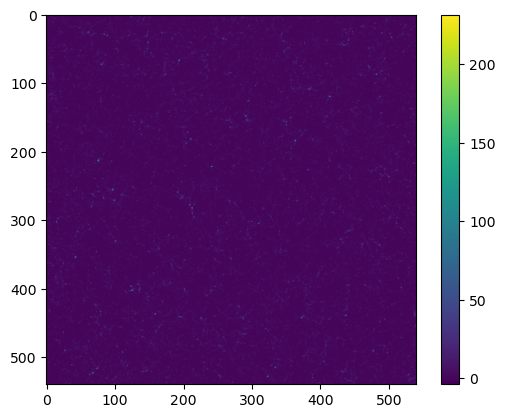

In [5]:
plt.imshow(field[:,:,0])
plt.colorbar()

In [6]:
field = np.load('/mnt/projects/bias_mock/rhogal_eul_bias_gaus.npy')
#mask, = np.where(field[:,:,0]==0)
plt.imshow((field[:,:,0]))
plt.colorbar()

In [7]:
mask = np.where(field[:,:,0]==0)
np.shape(field[:,:,0])

(540, 540)

In [8]:
lbox = 1440

bines = 20
rmin = 0
rmax = 3
#bineado = np.logspace(np.log10(rmin),np.log10(rmax),bines)
bineado = np.linspace(rmin,rmax,bines)

nvoids = 50

In [9]:
v.shape

(19268, 6)

CPU times: user 22.3 s, sys: 0 ns, total: 22.3 s
Wall time: 22.3 s


(0.0, 3.0)

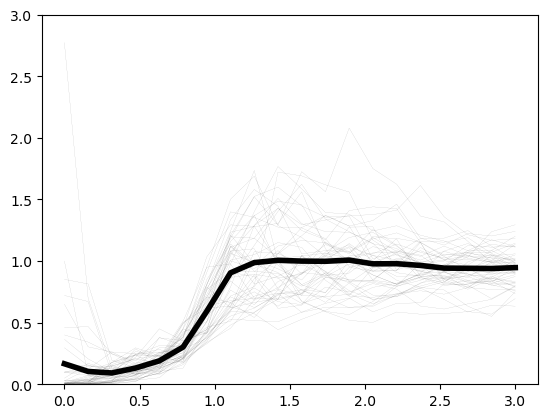

In [10]:
%%time
import warnings

warnings.filterwarnings("ignore")

profile = np.zeros([bines,nvoids])

for i in range(nvoids):
    x = v[i,2]
    y = v[i,3]
    z = v[i,4]
    rvoid = v[i,1]
    perfil, particulas = pg.profile_bias(x,y,z,rvoid,field,bines,bineado,lbox)
    profile[:,i] = perfil/particulas
    plt.plot(bineado,perfil/particulas,lw=.1,color='black',alpha=.4)
    
plt.plot(bineado,pg.mean_profile(profile),lw=4,color='black')
plt.ylim(0,3)

In [11]:
stop

NameError: name 'stop' is not defined

In [16]:
from joblib import Parallel, delayed

def calcular_perfiles(id_void):
    x = v[id_void, 2]
    y = v[id_void, 3]
    z = v[id_void, 4]
    rvoid = v[id_void, 1]
    prof, particles = pg.profile_bias(x,y,z,rvoid,field,nbines,bineado,lbox)
    return prof/particles 



field_name = 'rhogal_eul_bias_gaus'
field = np.load('/mnt/projects/bias_mock/'+field_name+'.npy')
#field_name = 'density_field_mio'
#field = np.load(field_name+'.npy')
v = np.loadtxt('sphvds_raul-0.8.dat')
num_procesos = 1
nvoids = 10 #len(v)
nbines = 30 
rmin = 0
rmax = 5
bineado = np.linspace(rmin,rmax,nbines+1)

rhomean = np.mean(field)
ngrid = field.shape[0]
lbox = 1440
bin_size = lbox/ngrid

if __name__ == "__main__":
      # Puedes ajustar este número según tu hardware
    
    id_voids = range(nvoids)
    #perfiles = Parallel(n_jobs=num_procesos)(delayed(calcular_perfiles)(id_void) for id_void in id_voids)
    perfiles = Parallel(n_jobs=num_procesos)(delayed(calcular_perfiles)(i) for i in id_voids)
    
    perfiles = np.array(perfiles)

In [14]:
perfiles.shape

(10, 30)

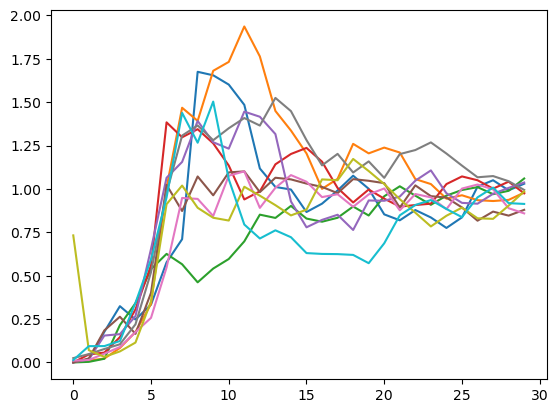

In [17]:
for i in range(nvoids):
    plt.plot(perfiles[i,:])

In [ ]:
field = np.load('/mnt/projects/bias_mock/rhogal_eul_bias_expansion.npy')
warnings.filterwarnings("ignore")

profile = np.zeros([bines,nvoids])

for i in range(nvoids):
    x = v[i,2]
    y = v[i,3]
    z = v[i,4]
    rvoid = v[i,1]
    perfil, particulas = pg.profile_bias(x,y,z,rvoid,field,bines,bineado,lbox)
    profile[:,i] = perfil/particulas
    plt.plot(bineado,perfil/particulas,lw=.1,color='black',alpha=.4)
    
plt.plot(bineado,pg.mean_profile(profile),lw=4,color='black')
plt.ylim(0,3)

In [ ]:
field = np.load('/mnt/projects/bias_mock/rhogal_eul_bias_gaus.npy')
warnings.filterwarnings("ignore")

profile = np.zeros([bines,nvoids])

for i in range(nvoids):
    x = v[i,2]
    y = v[i,3]
    z = v[i,4]
    rvoid = v[i,1]
    perfil, particulas = pg.profile_bias(x,y,z,rvoid,field,bines,bineado,lbox)
    profile[:,i] = perfil/particulas
    plt.plot(bineado,perfil/particulas,lw=.1,color='black',alpha=.4)
    
plt.plot(bineado,pg.mean_profile(profile),lw=4,color='black')
plt.ylim(0,3)

In [16]:
df = pd.read_csv('perfiles_rhodm_eul.dat')

In [25]:
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']

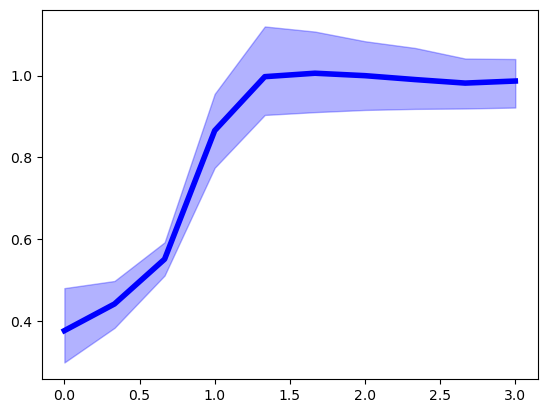

In [26]:
plt.plot(dist,mediana,color='blue',lw=4)
plt.fill_between(dist,q25,q75,color='blue',alpha=.3)

In [35]:
df = pd.read_csv('perfiles_rhodm_eul.dat')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']
plt.plot(dist,mediana,color='blue',lw=4,label='rhodm_eul')
plt.fill_between(dist,q25,q75,color='blue',alpha=.3)

df = pd.read_csv('perfiles_rhogal_eul_bias_gaus.dat')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']
plt.plot(dist,mediana,color='red',lw=4,label='rhogal_gaus')
plt.fill_between(dist,q25,q75,color='red',alpha=.3)

df = pd.read_csv('perfiles_rhogal_eul_bias_expansion.dat')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']
plt.plot(dist,mediana,color='green',lw=4,label='rhogal_expansion')
plt.fill_between(dist,q25,q75,color='green',alpha=.3)

plt.legend(frameon=False,fontsize=15,loc='lower right')
plt.tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
plt.tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
plt.tick_params(labelsize=15)
plt.minorticks_on()

plt.xlabel('$ \\rm d/r_{void} $', size=20)
plt.ylabel('$ \\rm bias $',size=20)

Text(0, 0.5, '$ \\rm bias $')

Text(0, 1, '$\\rm r_{void}>23 \\,Mpc$')

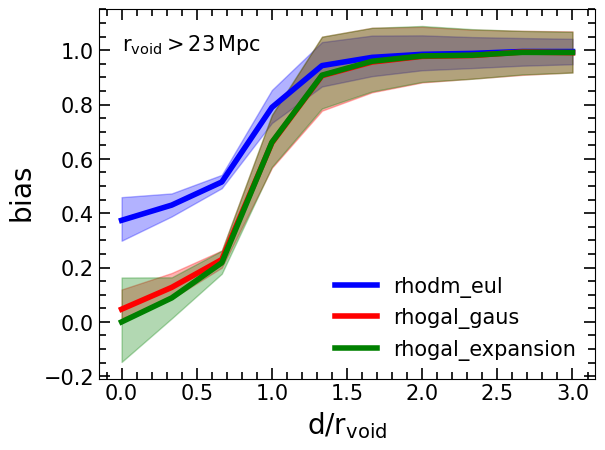

In [40]:
df = pd.read_csv('perfiles_rhodm_eul_grandes.dat')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']
plt.plot(dist,mediana,color='blue',lw=4,label='rhodm_eul')
plt.fill_between(dist,q25,q75,color='blue',alpha=.3)

df = pd.read_csv('perfiles_rhogal_eul_bias_gaus_grandes.dat')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']
plt.plot(dist,mediana,color='red',lw=4,label='rhogal_gaus')
plt.fill_between(dist,q25,q75,color='red',alpha=.3)

df = pd.read_csv('perfiles_rhogal_eul_bias_expansion_grandes.dat')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']
plt.plot(dist,mediana,color='green',lw=4,label='rhogal_expansion')
plt.fill_between(dist,q25,q75,color='green',alpha=.3)

plt.legend(frameon=False,fontsize=15,loc='lower right')
plt.tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
plt.tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
plt.tick_params(labelsize=15)
plt.minorticks_on()

plt.xlabel('$ \\rm d/r_{void} $', size=20)
plt.ylabel('$ \\rm bias $',size=20)

plt.text(0,1,'$\\rm r_{void}>23 \,Mpc$',size=15)